In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# First we read the data for manipulations

In [7]:
data=pd.read_csv('ml-100k/u.data',sep='\t',names=['uid','mid','rating','timestamp'])

In [8]:
data.head()

,uid,mid,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
item = pd.read_csv("ml-100k/u.item",sep='|',encoding='latin',             
names=['movie id',"movie title","release date",
        "video release date", "IMDb URL", "unknown","Action", 
       "Adventure","Animation", "Children's" ,"Comedy" ,"Crime",
       "Documentary","Drama", "Fantasy","Film-Noir",
       "Horror","Musical", "Mystery", "Romance", "Sci-Fi",
      "Thriller","War","Western" ] )

In [11]:
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
item = pd.read_csv("ml-100k/u.item",sep='|',encoding='latin',usecols=range(2),names=['mid','title'])


In [15]:
item.head()

,mid,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [17]:
info=pd.merge(data,item,on='mid')

In [18]:
info.head()

,uid,mid,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [19]:
info.drop('timestamp',axis=1,inplace=True)

In [20]:
info.head()

,uid,mid,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [28]:
info.title.head()

0    Star Wars (1977)
1    Star Wars (1977)
2    Star Wars (1977)
3    Star Wars (1977)
4    Star Wars (1977)
Name: title, dtype: object

In [37]:
info.groupby('title')['rating'].value_counts()

title                                  rating
'Til There Was You (1997)              2          3
                                       3          3
                                       1          2
                                       4          1
1-900 (1994)                           1          2
                                       4          2
                                       3          1
101 Dalmatians (1996)                  3         46
                                       4         25
                                       2         17
                                       1         15
                                       5          6
12 Angry Men (1957)                    5         60
                                       4         49
                                       3         15
                                       2          1
187 (1997)                             3         13
                                       4         11
                  

In [54]:
info[info['title']=='Star Wars (1977)'].groupby('rating')['title'].value_counts()

rating  title           
1       Star Wars (1977)      9
2       Star Wars (1977)     16
3       Star Wars (1977)     57
4       Star Wars (1977)    176
5       Star Wars (1977)    326
Name: title, dtype: int64

In [56]:
df=info.pivot_table(index='uid',columns='title',values='rating')

In [57]:
df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
uid,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
star_wars=df['Star Wars (1977)']

In [59]:
star_wars.head()

uid
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [60]:
star_wars.mean()

4.359589041095891

In [61]:
star_wars.max()

5.0

In [62]:
star_wars.min()

1.0

In [63]:
star_wars.median()

5.0

In [64]:
star_wars.mode()

0    5.0
dtype: float64

In [68]:
info.head()

,uid,mid,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [69]:
info.shape

(100003, 4)

In [70]:
sm=info.corrwith(star_wars)

In [74]:
dd=info.groupby('title').agg({'title':np.size,'rating':np.mean})

In [76]:
dd.head()

,title,rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390


In [78]:
dd.rename({'title':'size'},inplace=True,axis=1)

In [79]:
dd.head()

,size,rating
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390


In [84]:
popular_movie=dd[dd['size']>=100]

In [87]:
popular_movie.head()

,size,rating
title,,
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
2001: A Space Odyssey (1968),259,3.969112
Absolute Power (1997),127,3.370079
"Abyss, The (1989)",151,3.589404


In [91]:
popular_movie.sort_values(by='size',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
popular_movie.head()

,size,rating
title,,
I Know What You Did Last Summer (1997),100,3.060000
Muriel's Wedding (1994),100,3.550000
Private Parts (1997),100,3.530000
Alien 3 (1992),100,2.830000
Young Guns (1988),101,3.207921


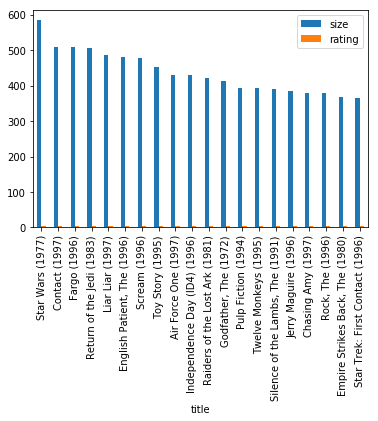

In [95]:
popular_movie.sort_values(['size','rating'],
    ascending=False)[:20].plot(kind='bar')
plt.show()

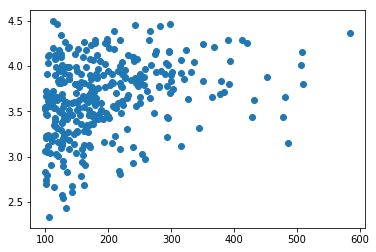

In [96]:
plt.scatter(popular_movie['size'],popular_movie['rating'])
plt.show()

In [98]:
sm=info.corrwith(star_wars)

In [99]:
sm

uid      -0.025136
mid      -0.004150
rating    0.039513
dtype: float64

In [100]:
info.head()

,uid,mid,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [101]:
df.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
uid,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
sm=df.corrwith(star_wars)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [103]:
sm.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [104]:
similar_movie=pd.DataFrame({
        'title':sm.index,
        'similarity':sm.values
})

In [105]:
similar_movie.head()

,title,similarity
0,'Til There Was You (1997),0.872872
1,1-900 (1994),-0.645497
2,101 Dalmatians (1996),0.211132
3,12 Angry Men (1957),0.184289
4,187 (1997),0.027398


In [106]:
popular_movie.head()

,size,rating
title,,
I Know What You Did Last Summer (1997),100,3.060000
Muriel's Wedding (1994),100,3.550000
Private Parts (1997),100,3.530000
Alien 3 (1992),100,2.830000
Young Guns (1988),101,3.207921


In [108]:
pop_movie=pd.DataFrame({
    'title':popular_movie.index,
    'size':popular_movie['size'].values,
    'rating':popular_movie['rating'].values
})

In [109]:
pop_movie.head()

,title,size,rating
0,I Know What You Did Last Summer (1997),100,3.060000
1,Muriel's Wedding (1994),100,3.550000
2,Private Parts (1997),100,3.530000
3,Alien 3 (1992),100,2.830000
4,Young Guns (1988),101,3.207921


In [110]:
mix=pd.merge(similar_movie,pop_movie)

In [111]:
mix.head()

,title,similarity,size,rating
0,101 Dalmatians (1996),0.211132,109,2.908257
1,12 Angry Men (1957),0.184289,125,4.344000
2,2001: A Space Odyssey (1968),0.230884,259,3.969112
3,Absolute Power (1997),0.085440,127,3.370079
4,"Abyss, The (1989)",0.203709,151,3.589404


In [116]:
mix.sort_values(['similarity','rating'],ascending=False)[:10]

,title,similarity,size,rating
295,Star Wars (1977),1.000000,584,4.359589
99,"Empire Strikes Back, The (1980)",0.748353,368,4.206522
255,Return of the Jedi (1983),0.672556,507,4.007890
247,Raiders of the Lost Ark (1981),0.536117,420,4.252381
24,Austin Powers: International Man of Mystery (1...,0.377433,130,3.246154
298,"Sting, The (1973)",0.367538,241,4.058091
162,Indiana Jones and the Last Crusade (1989),0.350107,331,3.930514
235,Pinocchio (1940),0.347868,101,3.673267
119,"Frighteners, The (1996)",0.332729,115,3.234783
176,L.A. Confidential (1997),0.319065,297,4.161616


In [119]:
similar_movie.sort_values(['similarity'],ascending=False)[:10]

,title,similarity
688,Hollow Reed (1996),1.0
1418,Stripes (1981),1.0
137,"Beans of Egypt, Maine, The (1994)",1.0
1272,Safe Passage (1994),1.0
1091,"Old Lady Who Walked in the Sea, The (Vieille q...",1.0
1114,"Outlaw, The (1943)",1.0
866,"Line King: Al Hirschfeld, The (1996)",1.0
717,Hurricane Streets (1998),1.0
619,"Good Man in Africa, A (1994)",1.0
1279,"Scarlet Letter, The (1926)",1.0
